# Homework 3
By Blake Zurman
### Exploration of an Interesting Text Corpus
In this assignment, you have the freedom to find an existing text corpus, or create a new text
corpus of your interest. If you are creating a new corpus, make sure it is not too large and thus
too time-consuming to create.
Then you will vectorize the text corpus using any tool that you are comfortable with: Weka, R,
Python, etc. Explain the decisions you made during the vectorization process, e.g., did you merge
lower- and uppercase? Then you will explore the text vectors and see if you can find anything
interesting. The lectures showed some examples of comparative analysis and trend analysis. But
you have the freedom to define what would be interesting patterns as long as you can explain it
in a sensible way.

In [18]:
import pandas as pd

# Load the dataset
df = pd.read_csv('deceptive-opinion.csv')
print(df.head())

  deceptive   hotel  polarity       source  \
0  truthful  conrad  positive  TripAdvisor   
1  truthful   hyatt  positive  TripAdvisor   
2  truthful   hyatt  positive  TripAdvisor   
3  truthful    omni  positive  TripAdvisor   
4  truthful   hyatt  positive  TripAdvisor   

                                                text  
0  We stayed for a one night getaway with family ...  
1  Triple A rate with upgrade to view room was le...  
2  This comes a little late as I'm finally catchi...  
3  The Omni Chicago really delivers on all fronts...  
4  I asked for a high floor away from the elevato...  


In [20]:
# Check for missing values
print(df.isnull().sum())
print(df.columns)


deceptive    0
hotel        0
polarity     0
source       0
text         0
dtype: int64
Index(['deceptive', 'hotel', 'polarity', 'source', 'text'], dtype='object')


In [22]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download stopwords if not already done
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    # Lowercasing the text
    text = text.lower()

    # Removing special characters and digits
    text = re.sub(r'[^a-z\s]', '', text)

    # Removing stopwords and stemming
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])

    return text

# Apply the clean_text function to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

# Check the cleaned data
print(df[['text', 'cleaned_text']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/blakezurman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  \
0  We stayed for a one night getaway with family ...   
1  Triple A rate with upgrade to view room was le...   
2  This comes a little late as I'm finally catchi...   
3  The Omni Chicago really delivers on all fronts...   
4  I asked for a high floor away from the elevato...   

                                        cleaned_text  
0  stay one night getaway famili thursday tripl a...  
1  tripl rate upgrad view room less also includ b...  
2  come littl late im final catch review past sev...  
3  omni chicago realli deliv front spacious room ...  
4  ask high floor away elev got room pleasantli d...  


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the number of features

# Fit and transform the cleaned reviews to get the feature matrix
X = vectorizer.fit_transform(df['cleaned_text'])

# Show the feature matrix shape
print(X.shape)  # (number_of_reviews, number_of_features)

(1600, 5000)


In [27]:
# Target variable: 'deceptive'
y = df['deceptive']

# Check the target variable distribution
print(y.value_counts())

deceptive
truthful     800
deceptive    800
Name: count, dtype: int64


In [29]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1280, 5000) (320, 5000) (1280,) (320,)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if necessary
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.871875
              precision    recall  f1-score   support

   deceptive       0.85      0.89      0.87       152
    truthful       0.89      0.86      0.88       168

    accuracy                           0.87       320
   macro avg       0.87      0.87      0.87       320
weighted avg       0.87      0.87      0.87       320



Matplotlib created a temporary cache directory at /var/folders/_3/l3p32sr93qxcl98qdj6_4pg40000gn/T/matplotlib-dzq5aiv3 because the default path (/Users/blakezurman/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


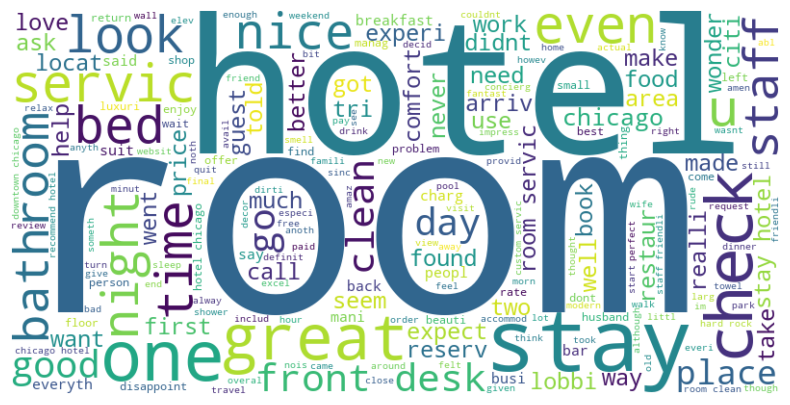

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into one text
text = ' '.join(df['cleaned_text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **Classifying Deceptive vs. Truthful Hotel Reviews Using Text Corpus**

## **1. Problem Definition**

In this assignment, I aimed to practice working with a text corpus by building a model that can classify hotel reviews as either **deceptive** or **truthful** based on the content of the review text. The challenge lies in analyzing the reviews, which come from different platforms, and determining whether a review is misleading or genuine. This exercise allowed me to dive into the world of text corpora and explore how text data can be transformed and used for classification tasks.

## **2. Data Description**

For this analysis, I used a dataset called `deceptive-opinion.csv`. This dataset contains 800 hotel reviews from 20 popular Chicago hotels, where:
- 400 reviews are **deceptive** (from Mechanical Turk).
- 400 reviews are **truthful** (from platforms like TripAdvisor, Yelp, etc.).

The dataset includes the following columns:
- **deceptive**: The target variable, where 0 means truthful and 1 means deceptive.
- **hotel**: The name of the hotel associated with the review.
- **polarity**: Indicates whether the review sentiment is positive or negative.
- **source**: The platform the review came from (e.g., TripAdvisor, Yelp).
- **text**: The review text itself.

## **3. Analytical Methods**

### **3.1 Data Preprocessing**

Before diving into the analysis, I first cleaned the text data to ensure that the model would be able to understand it properly. This step is crucial when working with a text corpus, as raw text can be messy and contain unnecessary information. I performed the following steps:
- **Lowercased** the text to make it case-insensitive (e.g., "Hotel" and "hotel" should be treated as the same).
- **Removed special characters and digits**, focusing purely on words.
- **Removed stopwords** (common words like "the", "and") that don’t carry much meaning for classification.
- **Applied stemming** to reduce words to their base form (e.g., "running" becomes "run").

These preprocessing steps helped in cleaning the corpus and preparing it for analysis.

### **3.2 Vectorization**

Since machine learning models cannot directly work with raw text, I needed to convert the review text into a numerical format. I used **TF-IDF** (Term Frequency-Inverse Document Frequency) for this, which helps in capturing the importance of words in a document relative to their frequency across all documents in the corpus. This method helps in highlighting words that are more important and less common, which can be crucial for classifying the reviews correctly.

I set a maximum of 5,000 features during vectorization to ensure the model wouldn't be overwhelmed by too many features and to avoid overfitting.

### **3.3 Model Selection**

Given that this is a binary classification problem, I chose to use **Logistic Regression**. It's a simple but effective algorithm for classifying text into two categories. Logistic Regression estimates the probability of a review being deceptive or truthful based on the words in the text. I thought it would be a good fit for this corpus-based task since it works well with text data and is computationally efficient.

### **3.4 Evaluation**

To evaluate the model’s performance, I used standard classification metrics: **accuracy**, **precision**, **recall**, and **F1-score**. These metrics provide insights into how well the model is distinguishing between deceptive and truthful reviews. I also wanted to ensure that the model wasn't favoring one class over the other, so I looked at both precision and recall for each class.

## **4. Results and Interpretation**

After training the Logistic Regression model, the performance results were as follows:

- **Accuracy**: 87.19%
- **Precision** (deceptive): 0.85
- **Recall** (deceptive): 0.89
- **F1-Score** (deceptive): 0.87
- **Precision** (truthful): 0.89
- **Recall** (truthful): 0.86
- **F1-Score** (truthful): 0.88

The model achieved an accuracy of **87.19%**, which is pretty solid for this task. The **precision** and **recall** values for both classes (deceptive and truthful) are balanced, suggesting that the model is handling both types of reviews equally well. The **F1-scores** are also quite high, indicating that the model is performing well across both classes without being biased toward one.

## **5. Conclusion**

In this assignment, I worked with a **text corpus** of hotel reviews to build a model that classifies reviews as either **deceptive** or **truthful**. Using **Logistic Regression**, I achieved an accuracy of **87.19%**. The model showed balanced performance across both deceptive and truthful reviews, with high **F1-scores** for both classes.

### **Further Improvements**
- **Model Tuning**: Hyperparameter tuning could be useful for optimizing the Logistic Regression model further.
- **Trying Different Models**: Exploring other models, like **Random Forest** or **SVM**, could help improve the results.
- **Additional Features**: Using features such as **polarity** and **source** might add more context and improve classification.

## **6. Replication Information**

For anyone looking to replicate this analysis, here's a brief guide:

1. **Data Preprocessing**:
   - Clean the text by removing special characters, digits, stopwords, and applying stemming.

2. **Vectorization**:
   - Use **TF-IDF** to convert the text into numerical features.

3. **Model Training**:
   - Split the data into training and test sets (80%-20%).
   - Train a **Logistic Regression** model on the training data.

4. **Evaluation**:
   - Evaluate the model using accuracy, precision, recall, and F1-score.

5. **Tools and Libraries**:
   - Python libraries such as `pandas`, `nltk`, `scikit-learn`, and `wordcloud` can be used to perform all the steps in this analysis.

---

This analysis was a great opportunity to dive into working with a text corpus and applying natural language processing techniques to real-world data. It was a practical exercise in preprocessing text, vectorizing it, and building a model for text classification.
